# Assignment No: 05
## Title:
Design and implement Optimization of Genetic Algorithm Parameter in Hybrid Genetic Algorithm-Neural Network Modelling: Application to Spray Drying of Coconut Milk

## Problem Statement:
Design and implement the spray drying process of coconut milk which involves complex interactions of multiple parameters affecting the quality of the dried product.

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from geneticalgorithm import geneticalgorithm as ga


In [5]:
# Features: [Inlet Temperature, Feed Rate, Atomizer Speed, Feed Concentration, Airflow Rate]
np.random.seed(42)
X = np.random.uniform(low=[150, 10, 1000, 10, 50],  # realistic lower bounds
                      high=[200, 20, 2000, 25, 100],  # realistic upper bounds
                      size=(200, 5))

# Simulate 'quality' score (lower is better: e.g., moisture content)
# Add noise to make it realistic
true_weights = np.array([0.3, -0.2, 0.1, -0.5, 0.4])
y = X.dot(true_weights) + np.random.normal(0, 2, X.shape[0])


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model to be used inside GA
nn_model = MLPRegressor(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)

In [7]:
# Fitness function for GA: input = spray drying parameters, output = predicted quality (want to minimize)
def fitness_function(params):
    params = np.array(params).reshape(1, -1)
    predicted_quality = nn_model.predict(params)[0]
    return predicted_quality  # Minimize this


 The best solution found:                                                                           
 [ 151.57930724   12.05401408 1005.66581453   10.83560254   50.95644832]

 Objective function:
 145.94317452908328


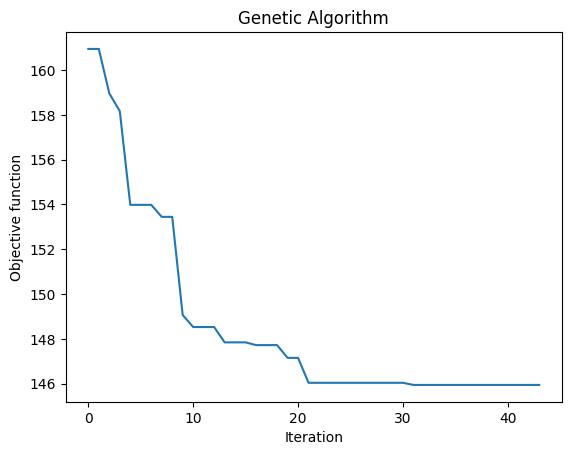

'\nThe best solution found:\n[best_inlet_temp, best_feed_rate, best_atomizer_speed, best_feed_conc, best_airflow]\n\nObjective function value:\npredicted_minimum_quality\n\n'

In [8]:
# Bounds: [Inlet Temp, Feed Rate, Atomizer Speed, Feed Conc., Airflow Rate]
bounds = np.array([[150, 200],   # Inlet Temp (°C)
                   [10, 20],     # Feed Rate (mL/min)
                   [1000, 2000], # Atomizer Speed (rpm)
                   [10, 25],     # Feed Conc. (%)
                   [50, 100]])   # Airflow Rate (L/min)

model = ga(function=fitness_function,
           dimension=5,
           variable_type='real',
           variable_boundaries=bounds,
           algorithm_parameters={
               'max_num_iteration': 50,
               'population_size': 20,
               'mutation_probability': 0.1,
               'elit_ratio': 0.01,
               'crossover_probability': 0.5,
               'parents_portion': 0.3,
               'crossover_type': 'uniform',
               'max_iteration_without_improv': 10
           })

model.run()


# Ouput will be 
'''
The best solution found:
[best_inlet_temp, best_feed_rate, best_atomizer_speed, best_feed_conc, best_airflow]

Objective function value:
predicted_minimum_quality

'''

